In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('restaurant_data.csv')
risks = {'None': 0, 'Moderate Risk': 2, 'Low Risk': 1, 'High Risk': 3}     ###changed 2 to 1 for 'low risk'
health_office = [37.778155, -122.418614]
df['miles_from_inspector'] = (((df.latitude - health_office[0])*69)**2 + ((df.longitude - health_office[1])*55)**2)**.5
df['risk_numeric'] = [risks[c] for c in df.risk_category]
df['time'] = [pd.to_datetime('{}/{}/{}'.format(r[1].day, r[1].month, r[1].year), format='%d/%m/%Y') for r in df.iterrows()]

sort = df.sort_values('time')
sort['ind'] = list(range(len(sort)))
sort.head()

inspection_counts = []
most_recent_ind = {}
inspections_between = {}
keys_seen = set()
for i, row in sort.iterrows():
    key = '{}{}'.format(row.business_id, row.time)
    if key not in keys_seen:
        id_ = row.business_id
        if id_ in most_recent_ind:
            between = row.ind - most_recent_ind[id_]
            inspections_between[key] = between
            inspection_counts.append(between)
        most_recent_ind[id_] = row.ind
    keys_seen.add(key)
    
df['inspections_since'] = df.apply(lambda row: inspections_between.get('{}{}'.format(row.business_id, row.time), int(np.mean(
    inspection_counts))), axis = 1)

times = []
key_to_avg_time_between_mapping = {}     #maps time-business_id keys to the average time between all prior inspections
key_to_time_until = {}
for b in df.business_id.unique():
    dfb = df[df.business_id == b].sort_values('time', ascending = True)
    old_time = -1
    old_key = -1
    times_for_this_business = []
    for i, row in dfb.iterrows():
        time = row.time
        key = '{}{}'.format(row.business_id, row.time)
        if old_time == -1:
            key_to_avg_time_between_mapping[key] = None
        elif time != old_time:
            time_diff = np.abs(int((time - old_time).days))
            times.append(time_diff)
            times_for_this_business.append(time_diff)
            key_to_avg_time_between_mapping[key] = int(np.floor(np.mean(times_for_this_business)))
            key_to_time_until[old_key] = time_diff     
        old_time = time
        old_key = key
        
mean_time_diff = int(np.floor(np.mean(times)))
for i in key_to_avg_time_between_mapping:
    if key_to_avg_time_between_mapping[i] == None:
        key_to_avg_time_between_mapping[i] = mean_time_diff
        
mean_time_diff

df['time_since'] = df.apply(lambda row: key_to_avg_time_between_mapping['{}{}'.format(row.business_id, row.time)], axis = 1)
df['time_until'] = df.apply(lambda row: key_to_time_until.get('{}{}'.format(row.business_id, row.time), -1), axis = 1)

In [24]:
df.head(50)

,month,day,year,business_id,risk_category,inspection_score,zipcode,latitude,longitude,miles_from_inspector,risk_numeric,time,inspections_since,time_since,time_until
0,2,26,2018,10030,None,100,94103,37.766864,-122.419014,0.779390,0,2018-02-26,1141,388,-1
1,9,5,2017,10083,Moderate Risk,81,94111,37.794024,-122.401299,1.451159,2,2017-09-05,1141,388,598
2,9,5,2017,10083,Moderate Risk,81,94111,37.794024,-122.401299,1.451159,2,2017-09-05,1141,388,598
3,4,26,2019,10083,Moderate Risk,86,94111,37.794024,-122.401299,1.451159,2,2019-04-26,1882,598,-1
4,9,19,2017,10280,Moderate Risk,92,94102,37.782034,-122.419777,0.275188,2,2017-09-19,1141,388,198
5,4,5,2018,10280,Low Risk,88,94102,37.782034,-122.419777,0.275188,1,2018-04-05,732,198,196
6,10,18,2018,10280,High Risk,81,94102,37.782034,-122.419777,0.275188,3,2018-10-18,514,197,134
7,10,18,2018,10280,Low Risk,81,94102,37.782034,-122.419777,0.275188,1,2018-10-18,514,197,134
8,10,18,2018,10280,Low Risk,81,94102,37.782034,-122.419777,0.275188,1,2018-10-18,514,197,134
9,10,18,2018,10280,Low Risk,81,94102,37.782034,-122.419777,0.275188,1,2018-10-18,514,197,134


In [54]:
def prep_data(X, test = False):
    #X is subset of df; if not test, then the latest inspection for a given business_id is excluded
    X = X[['time', 'business_id', 'risk_numeric', 'inspection_score', 'miles_from_inspector', 
           'inspections_since', 'time_since', 'time_until']]
    
    max_times = {}
    for i, row in X.iterrows():
        if row.business_id in max_times:
            max_times[row.business_id] = max([max_times[row.business_id], row.time])
        else:
            max_times[row.business_id] = row.time
    if not test:
        X = X[X.time < X.apply(lambda row:max_times[row.business_id], axis=1)]
    if test:
        X = X[X.time == X.apply(lambda row:max_times[row.business_id], axis=1)]
    
    max_risk = {}
    counts = {}
    for i, row in X.iterrows():
        key = '{}{}'.format(row.business_id, row.time)
        counts[key] = counts.get(key, 0) + 1
        if key in max_risk:
            max_risk[key] = max([max_risk[key], row.risk_numeric])
        else:
            max_risk[key] = row.risk_numeric

    mask = []
    seen = set()
    for i, row in X.iterrows():
        key = '{}{}'.format(row.business_id, row.time)
        if key not in seen:
            mask.append(True)
            seen.add(key)
        else:
            mask.append(False)

    X = X[mask]

    for i, row in X.iterrows():
        key = '{}{}'.format(row.business_id, row.time)
        row.risk_numeric = max_risk[key]

    X['violation_total'] = X.apply(lambda row: counts['{}{}'.format(row.business_id, row.time)], axis = 1)
    
    X['time_since'] = X['time_since'] - mean_time_diff
    X['inspections_since'] = X['inspections_since'] - int(np.mean(inspection_counts))
    
    return X

X = df[df.year != 2019]
X = prep_data(X)

test_data = df[df.year != 2019]
test_data = prep_data(test_data, test = True)

In [56]:
X.head()

,time,business_id,risk_numeric,inspection_score,miles_from_inspector,inspections_since,time_since,time_until,violation_total
4,2017-09-19,10280,2,92,0.275188,0,0,198,1
5,2018-04-05,10280,1,88,0.275188,-409,-190,196,1
12,2017-05-23,10282,3,91,1.676005,0,0,385,1
15,2017-10-02,10332,2,79,0.400260,0,0,421,3
30,2017-06-05,10540,1,72,1.803992,0,0,375,6


In [72]:
y = X.time_until

In [94]:
def get_beta(X, y):
    X_features = X[[i for i in X.columns if i not in ['time_until', 'time', 'business_id', 'time_since']]]
    X_features['intercept'] = 1
    beta = np.dot(np.dot(np.linalg.inv(np.dot(X_features.T, X_features)), X_features.T), y)
    return beta

In [101]:
def calibrate(X, y):
    X_shuffle = X.sample(frac=1, random_state=123).reset_index(drop=True)
    X_shuffle['intercept'] = 1
    subsets = np.array_split(X_shuffle, 10)
    all_resid = []
    all_pred = []

    for i in range(10):
        hold_out = subsets[i]
        train = pd.concat(subsets[0:i] + subsets[i+1:10])
        y = train.time_until
        X_features = train[[i for i in train.columns if i not in ['time_until', 'time', 'business_id', 'time_since']]]
        X_features['intercept'] = 1
        beta = np.dot(np.dot(np.linalg.inv(np.dot(X_features.T, X_features)), X_features.T), y)

        pred = np.dot(hold_out[[i for i in train.columns if i not in ['time_until', 'time', 'business_id', 'time_since']]], beta)
        resid = pred - hold_out.time_until
        all_pred.extend(pred)
        all_resid.extend(list(resid))

    interval_size = pd.Series(all_resid).quantile(.95)
    interval_size
    
    return interval_size

In [102]:
get_beta(X, y)

C:\Users\hmoor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([ 13.87183667,   1.50751589,   3.83625384,   0.1792385 ,
         7.39216189, 169.99278812])

In [103]:
calibrate(X, y)

C:\Users\hmoor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


177.20834433046994

In [104]:
beta  = get_beta(X, y)
offset = calibrate(X, y)

check_data = df[df.year == 2019]
check_data = check_data.sort_values('time')

covered_count = 0
for i, row in test_data.iterrows():
    estimate = row.risk_numeric * beta[0] + row.inspection_score * beta[1] + row.miles_from_inspector * beta[2] + \
        row.inspections_since * beta[3] + row.violation_total * beta[4] + 1 * beta[5]
    print('estimate:', estimate)
    cutoff = estimate - offset
    id_ = row.business_id
    id_filt = check_data[check_data.business_id == id_]
    if len(id_filt) == 0:
        covered_count += 1
    else:
        since = id_filt.iloc[0].time_since
        if since > cutoff:
            covered_count += 1
        print('cutoff:', cutoff, 'since:', since)
            
covered_rate = covered_count / len(test_data)
covered_rate     ###getting a rate of 1.0 for both time and inspections since; may be an error somewhere in here though

C:\Users\hmoor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hmoor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


estimate: 331.1264747846611
estimate: 340.1965863519378
cutoff: 162.98824202146787 since: 598
estimate: 251.9588837579376
cutoff: 74.75053942746766 since: 176
estimate: 359.3637416447432
estimate: 342.32815888092733
cutoff: 165.1198145504574 since: 326
estimate: 324.1438852128928
cutoff: 146.93554088242288 since: 545
estimate: 374.64028650859666
cutoff: 197.43194217812672 since: 327
estimate: 337.36660890391965
estimate: 352.387567753746
cutoff: 175.17922342327606 since: 336
estimate: 322.81576337093816
cutoff: 145.60741904046822 since: 538
estimate: 309.3729275544613
estimate: 329.5189499918054
cutoff: 152.31060566133547 since: 487
estimate: 346.05515365889767
estimate: 342.9903509986391
cutoff: 165.78200666816915 since: 539
estimate: 328.9269706853797
estimate: 350.59523853362487
cutoff: 173.38689420315492 since: 484
estimate: 365.0245760787179
estimate: 350.43608752234076
cutoff: 173.22774319187081 since: 741
estimate: 233.67515675794243
cutoff: 56.46681242747249 since: 358
estimate

estimate: 350.1074577971857
cutoff: 172.89911346671576 since: 584
estimate: 346.95601488041723
estimate: 336.34074781996117
estimate: 369.3092525011727
cutoff: 192.10090817070275 since: 412
estimate: 344.4137216789951
estimate: 331.7574899684709
estimate: 353.1489242519435
cutoff: 175.94057992147359 since: 324
estimate: 336.08993551409316
estimate: 356.0337770896459
estimate: 359.9610012777305
estimate: 350.03047320322685
cutoff: 172.8221288727569 since: 316
estimate: 285.3797192411646
cutoff: 108.17137491069465 since: 294
estimate: 342.55204059571975
cutoff: 165.3436962652498 since: 526
estimate: 334.02656552265273
estimate: 360.3099071386735
cutoff: 183.10156280820357 since: 326
estimate: 340.636692860834
cutoff: 163.42834853036405 since: 468
estimate: 306.79438846000994
estimate: 374.5442572049084
cutoff: 197.33591287443843 since: 501
estimate: 327.121441927743
cutoff: 149.91309759727304 since: 825
estimate: 361.09086949597184
cutoff: 183.8825251655019 since: 455
estimate: 354.09755

estimate: 347.91250673921013
cutoff: 170.7041624087402 since: 789
estimate: 343.9781674751471
estimate: 350.42486883053897
estimate: 363.88548305553337
estimate: 341.74335976350994
cutoff: 164.53501543304 since: 534
estimate: 330.31822298903467
cutoff: 153.10987865856472 since: 482
estimate: 359.41707295464175
cutoff: 182.2087286241718 since: 484
estimate: 130.2340711108973
cutoff: -46.97427321957264 since: 228
estimate: 334.1772461951334
estimate: 358.45627653170516
cutoff: 181.24793220123522 since: 471
estimate: 354.07914641288255
cutoff: 176.8708020824126 since: 471
estimate: 334.40145367130947
estimate: 348.78475949906135
estimate: 352.4262129886082
estimate: 367.29693559173234
estimate: 383.60901723305113
estimate: 324.1635915673487
cutoff: 146.95524723687876 since: 286
estimate: 353.4221318271973
cutoff: 176.21378749672735 since: 583
estimate: 328.83342100264446
estimate: 370.98920809683705
cutoff: 193.7808637663671 since: 519
estimate: 364.1442215922251
cutoff: 186.9358772617551

estimate: 427.726345065062
estimate: 250.7010737374983
cutoff: 73.49272940702835 since: 261
estimate: 327.94111965815966
cutoff: 150.73277532768972 since: 411
estimate: 368.41211612613563
estimate: 338.1317912400709
cutoff: 160.92344690960098 since: 363
estimate: 343.0652730695223
cutoff: 165.85692873905234 since: 885
estimate: 306.9684685656328
estimate: 345.9091600149028
estimate: 252.53379701330763
estimate: 337.3492173025985
estimate: 315.5301996159159
cutoff: 138.32185528544593 since: 456
estimate: 335.6118854421576
estimate: 355.89511300260455
estimate: 353.4726966124404
cutoff: 176.26435228197047 since: 330
estimate: 390.7679974875192
estimate: 277.19651651557433
estimate: 351.8650540824916
cutoff: 174.65670975202167 since: 510
estimate: 344.9119037524139
cutoff: 167.70355942194394 since: 599
estimate: 336.3877823734638
estimate: 289.8337184098252
cutoff: 112.62537407935528 since: 594
estimate: 257.0568159234268
estimate: 255.37677922099243
estimate: 146.25023156810508
estimate:

estimate: 349.546297197693
cutoff: 172.33795286722304 since: 399
estimate: 366.09956975591297
estimate: 139.19953757766064
cutoff: -38.008806752809306 since: 254
estimate: 272.51883210748207
estimate: 337.2956306295806
estimate: 440.2843748837993
estimate: 355.0907831987592
cutoff: 177.88243886828926 since: 478
estimate: 333.33221257662257
cutoff: 156.12386824615263 since: 616
estimate: 369.0414021009784
estimate: 239.9436422565169
estimate: 361.82248069672335
estimate: 338.18165897709696
cutoff: 160.97331464662702 since: 451
estimate: 336.0056153061163
cutoff: 158.79727097564634 since: 322
estimate: 370.49832955194955
estimate: 351.984298343311
estimate: 280.225954016978
cutoff: 103.01760968650805 since: 248
estimate: 434.23626152161535
estimate: 343.1679173593731
cutoff: 165.95957302890318 since: 528
estimate: 340.6313426362166
estimate: 331.751813477039
cutoff: 154.54346914656904 since: 522
estimate: 260.3382326947097
cutoff: 83.12988836423975 since: 476
estimate: 342.8378176074566


1.0

In [86]:
type(since)

pandas.core.series.Series

In [83]:
pd.concat(subsets)

,time,business_id,risk_numeric,inspection_score,miles_from_inspector,time_since,time_until,violation_total
0,2016-10-06,33911,3,68,2.336897,388,461,4
1,2017-03-16,68615,2,73,1.716035,388,312,2
2,2017-02-01,59838,1,94,1.046170,388,537,1
3,2017-09-05,10083,2,81,1.451159,388,598,2
4,2017-05-03,32738,1,92,3.167822,388,393,2
...,...,...,...,...,...,...,...,...
952,2016-11-21,59599,1,94,0.725483,388,283,1
953,2016-12-21,25301,2,81,1.043386,388,393,1
954,2019-03-08,36571,1,85,4.119542,287,196,3
955,2017-05-18,61563,2,89,1.250148,388,806,1


In [ ]:
plt.hist([i.month for i in X.time])

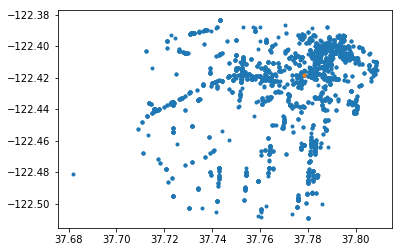

In [21]:
plt.plot(df.latitude, df.longitude, '.')
plt.plot([37.778155], [-122.418614], '.')

In [74]:
for r in range(4):
    filt = X_features[X_features.risk_numeric == r]
    print(filt.inspection_score.mean())

98.20930232558139
87.74245939675174
85.59654178674351
80.38970588235294
